In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Shopping Mall Customer Segmentation Data .csv')
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.2+ KB
None
                Age  Annual Income  Spending Score
count  15079.000000   15079.000000    15079.000000
mean      54.191591  109742.880562       50.591617
std       21.119207   52249.425866       28.726977
min       18.000000   20022.000000        1.000000
25%       36.000000   64141.000000       26.000000
50%       54.000000  109190.000000       51.000000
75%       72.000000  155008.000000       75.000000
max       90.000000  199974.000000      100.000000


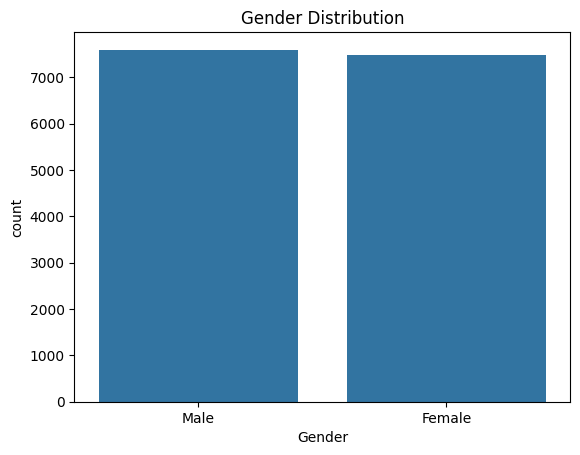

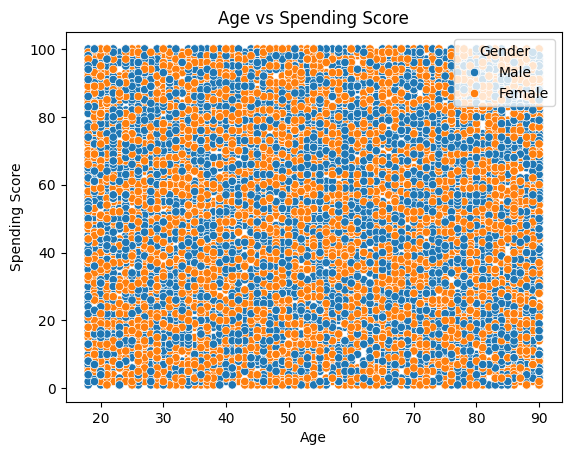

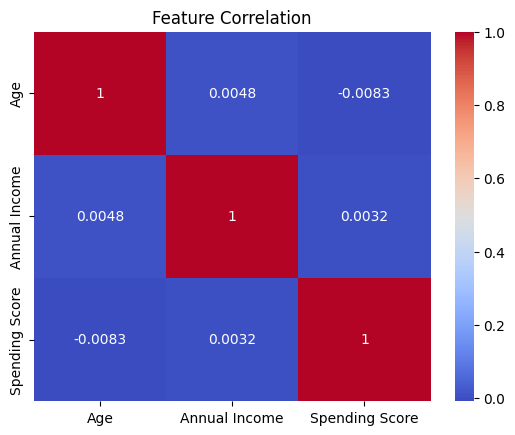

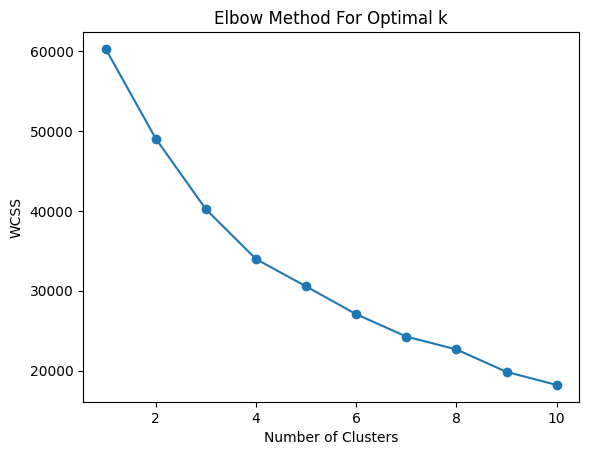

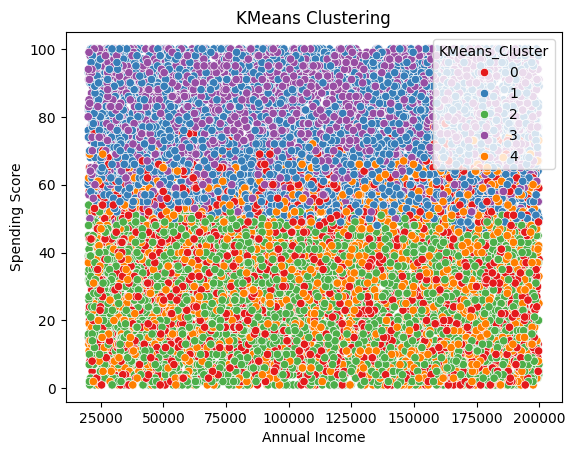

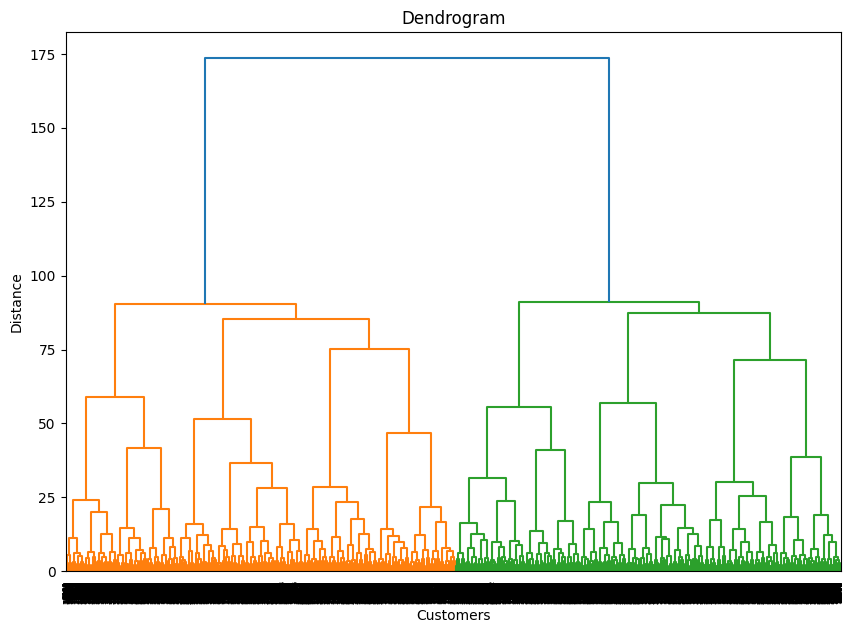

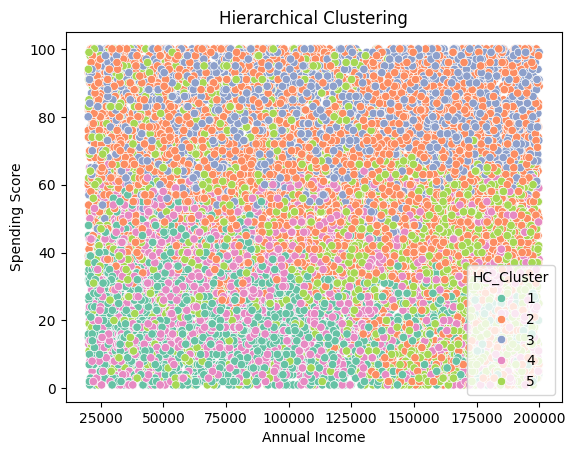

KMeans Silhouette Score: 0.228
Hierarchical Clustering Silhouette Score: 0.180


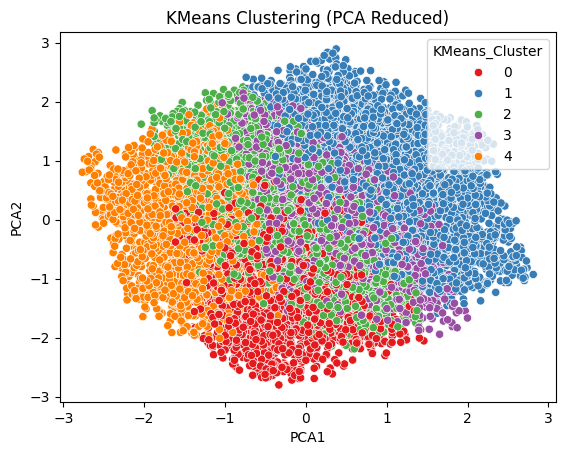

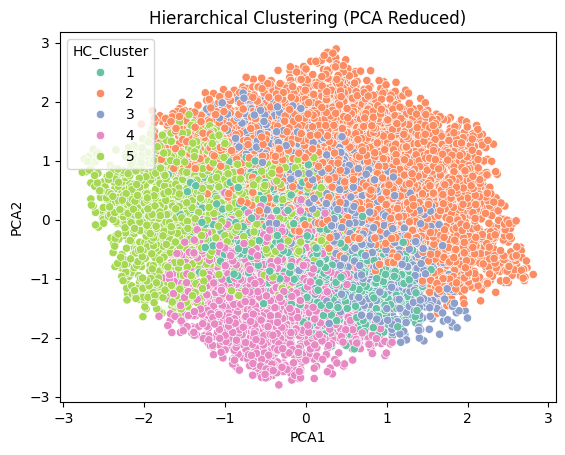

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


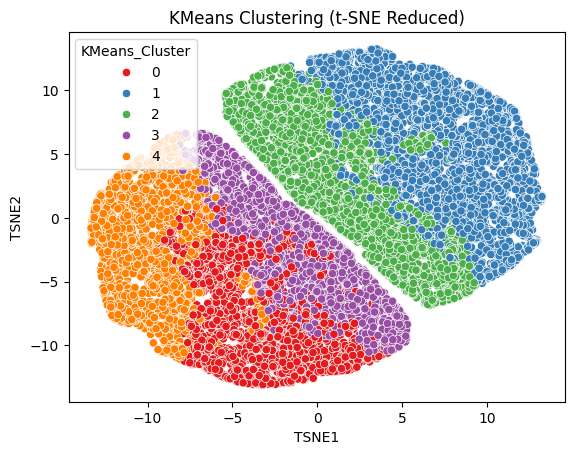

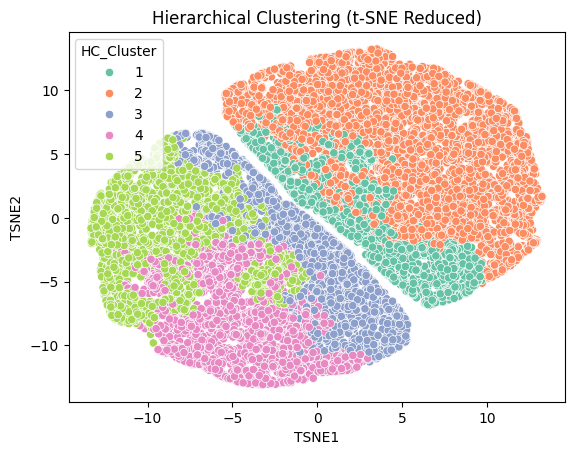

In [7]:
# Mall Customer Segmentation - KMeans & Hierarchical Clustering

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#from google.colab import files
#uploaded = files.upload()

# Step 2: Load the Dataset
df = pd.read_csv('Shopping Mall Customer Segmentation Data .csv')
df.head()

# Step 3: Exploratory Data Analysis
print(df.info())
print(df.describe())
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()
sns.scatterplot(data=df, x='Age', y='Spending Score', hue='Gender')
plt.title('Age vs Spending Score')
plt.show()
# Calculate correlation on numeric columns only
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Step 4: Preprocessing
df_clean = df.drop('Customer ID', axis=1)
df_clean['Gender'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

# Step 5: Elbow Method for Optimal k (KMeans)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

# Step 6: KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)
sns.scatterplot(x=df['Annual Income'], y=df['Spending Score'], hue=df['KMeans_Cluster'], palette='Set1')
plt.title('KMeans Clustering')
plt.show()

# Step 7: Hierarchical Clustering
# Step 7: Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster # Import linkage, dendrogram, and fcluster

linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

hc_clusters = fcluster(linked, 5, criterion='maxclust')
df['HC_Cluster'] = hc_clusters
sns.scatterplot(x=df['Annual Income'], y=df['Spending Score'], hue=df['HC_Cluster'], palette='Set2')
plt.title('Hierarchical Clustering')
plt.show()


# Step 8: Silhouette Scores
kmeans_score = silhouette_score(scaled_data, df['KMeans_Cluster'])
hc_score = silhouette_score(scaled_data, df['HC_Cluster'])
print(f"KMeans Silhouette Score: {kmeans_score:.3f}")
print(f"Hierarchical Clustering Silhouette Score: {hc_score:.3f}")

# Step 9: PCA for Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df, palette='Set1')
plt.title('KMeans Clustering (PCA Reduced)')
plt.show()
sns.scatterplot(x='PCA1', y='PCA2', hue='HC_Cluster', data=df, palette='Set2')
plt.title('Hierarchical Clustering (PCA Reduced)')
plt.show()

# Step 10: t-SNE for Visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)
df['TSNE1'] = tsne_data[:, 0]
df['TSNE2'] = tsne_data[:, 1]
sns.scatterplot(x='TSNE1', y='TSNE2', hue='KMeans_Cluster', data=df, palette='Set1')
plt.title('KMeans Clustering (t-SNE Reduced)')
plt.show()
sns.scatterplot(x='TSNE1', y='TSNE2', hue='HC_Cluster', data=df, palette='Set2')
plt.title('Hierarchical Clustering (t-SNE Reduced)')
plt.show()

In [5]:
!pip install gradio huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.8 MB/s eta 0:00:00


In [12]:
!pip install gradio

In [13]:
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np

def customer_segmentation_graph(input_data):
    # Tumhara segmentation code yahan ho sakta hai
    x = np.linspace(0, 10, 100)
    y = np.sin(x)  # Example, replace with segmentation data

    plt.figure(figsize=(6, 4))
    plt.plot(x, y, label="Customer Segments")
    plt.title("Customer Segmentation Analysis")
    plt.xlabel("X-axis (e.g., age)")
    plt.ylabel("Y-axis (e.g., spending)")
    plt.legend()

    plt.savefig('/tmp/segmentation_graph.png')
    return '/tmp/segmentation_graph.png'

# Gradio Interface
iface = gr.Interface(fn=customer_segmentation_graph, inputs="text", outputs="image")
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://323eb0571e26224a43.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [8]:
!pip install -q huggingface_hub


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
The token `gradio_token` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate w

In [19]:
!ls

'Customer_Segmentation (1).ipynb'   sample_data
 customer_segmentation.py	   'Shopping Mall Customer Segmentation Data .csv'


In [24]:
# `customer_segmentation.py` file create karna
with open("/content/customer_segmentation.py", "w") as f:
    f.write("""
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def customer_segmentation_graph(input_file):
    df = pd.read_csv(input_file.name)
    x = df['Age']
    y = df['Spending']

    kmeans = KMeans(n_clusters=3)
    df['Cluster'] = kmeans.fit_predict(df[['Age', 'Spending']])

    plt.figure(figsize=(6, 4))
    plt.scatter(df['Age'], df['Spending'], c=df['Cluster'], cmap='viridis')
    plt.title("Customer Segmentation Analysis")
    plt.xlabel("Age")
    plt.ylabel("Spending")
    plt.colorbar(label="Cluster")
    plt.savefig('/tmp/segmentation_graph.png')
    return '/tmp/segmentation_graph.png'
""")


In [25]:
# `app.py` file create karna
with open("/content/app.py", "w") as f:
    f.write("""
import gradio as gr
from customer_segmentation import customer_segmentation_graph

iface = gr.Interface(fn=customer_segmentation_graph, inputs=gr.File(), outputs="image")
iface.launch()
""")


In [26]:
# Check if files are created and saved
!ls /content/


 app.py   customer_segmentation.py   sample_data  'Shopping Mall Customer Segmentation Data .csv'


In [27]:
from google.colab import files
files.download('/content/app.py')
files.download('/content/customer_segmentation.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>